In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.signal import find_peaks
from sklearn.metrics import mutual_info_score
from matplotlib.pyplot import figure
import matplotlib
import seaborn as sns

matplotlib.rc('figure', figsize=(18, 4))

In [2]:
data = pd.read_csv('TrozoC.txt', delimiter='\t', header=None, skiprows = range(3), decimal = ",", index_col = False)

In [4]:
data.head()

,0,1,2
0,0.004883,0.015259,NaN
1,0.001526,0.024109,NaN
2,-0.010681,0.031128,NaN
3,-0.022278,0.041809,NaN
4,-0.028076,0.045471,NaN


In [5]:
print(len(data))
data.drop(columns=[2], inplace=True)
data.columns = ['LP','VD']
data = data.apply(pd.to_numeric)
# data['Time'] = data.index*0.1
data['Time'] = data.index
print(data.head())

# Sample interval = 0,100000
# Number of channels = 3
# Number of samples per channel = 16384000

19847700
         LP        VD  Time
0  0.004883  0.015259     0
1  0.001526  0.024109     1
2 -0.010681  0.031128     2
3 -0.022278  0.041809     3
4 -0.028076  0.045471     4


In [6]:
data.dropna(axis=0, how='any',inplace=True)
data.isnull().sum()

LP      0
VD      0
Time    0
dtype: int64

In [7]:
data.describe()

,LP,VD,Time
count,1.984770e+07,1.984770e+07,1.984770e+07
mean,-2.253853e-08,4.385849e-02,9.923850e+06
std,8.214042e-02,3.287948e-02,5.729538e+06
min,-7.101440e-01,-2.170715e+00,0.000000e+00
25%,-2.288800e-02,3.295900e-02,4.961925e+06
50%,3.050000e-04,4.364000e-02,9.923850e+06
75%,2.410900e-02,5.401600e-02,1.488577e+07
max,9.344480e-01,1.351624e+00,1.984770e+07


In [8]:
lp_mean = np.mean(data.LP)
lp_sd = np.std(data.LP)
low_lp, high_lp = lp_mean-1*lp_sd, lp_mean+1*lp_sd
print('LP:\n\tMean: %f\n\tSD: %f\n\tLow: %f\n\tHigh: %f'%(lp_mean,lp_sd,low_lp,high_lp))

vd_mean = np.mean(data.VD)
vd_sd = np.std(data.VD)
low_vd, high_vd = vd_mean-1*vd_sd, vd_mean+1*vd_sd
print('VD:\n\tMean: %f\n\tSD: %f\n\tLow: %f\n\tHigh: %f'%(vd_mean,vd_sd,low_vd,high_vd))

LP:
	Mean: -0.000000
	SD: 0.082140
	Low: -0.082140
	High: 0.082140
VD:
	Mean: 0.043858
	SD: 0.032879
	Low: 0.010979
	High: 0.076738


Text(0.08673797138910881, 50000.0, '0.08')

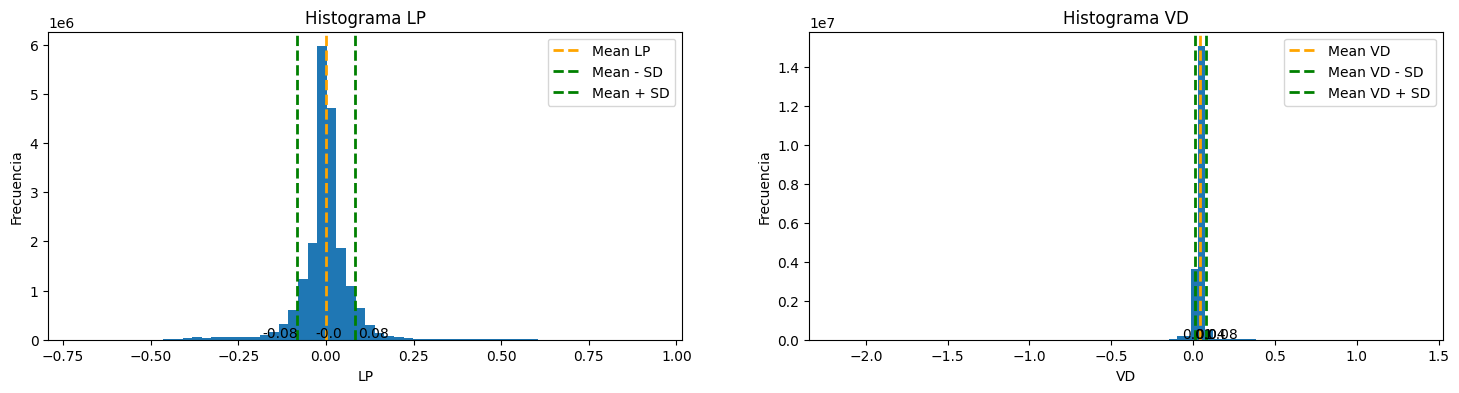

In [9]:
plt.subplot(1,2,1)
plt.hist(data.LP, bins=60)
plt.axvline(x = lp_mean, color='orange', linestyle='--', linewidth=2, label = 'Mean LP')
plt.axvline(x = low_lp, color='g', linestyle='--', linewidth=2, label = 'Mean - SD')
plt.axvline(x = high_lp, color='g', linestyle='--', linewidth=2, label = 'Mean + SD')
plt.title('Histograma LP')
plt.xlabel('LP')
plt.ylabel('Frecuencia')
plt.legend()
plt.annotate(str(round(lp_mean,2)),(lp_mean -0.03,0.05e6))
plt.annotate(str(round(low_lp,2)),(low_lp - 0.1,0.05e6))
plt.annotate(str(round(high_lp,2)),(high_lp + 0.01,0.05e6))

plt.subplot(1,2,2)
plt.hist(data.VD, bins=80)
plt.axvline(x = vd_mean, color='orange', linestyle='--', linewidth=2, label = 'Mean VD')
plt.axvline(x = low_vd, color='g', linestyle='--', linewidth=2, label = 'Mean VD - SD')
plt.axvline(x = high_vd, color='g', linestyle='--', linewidth=2, label = 'Mean VD + SD')
plt.title('Histograma VD')
plt.xlabel('VD')
plt.ylabel('Frecuencia')
plt.legend()
plt.annotate(str(round(vd_mean,2)),(vd_mean + -0.03,+0.05e6))
plt.annotate(str(round(low_vd,2)),(low_vd  - 0.08,+0.05e6))
plt.annotate(str(round(high_vd,2)),(high_vd + 0.01,+0.05e6))

In [10]:
data.head()

,LP,VD,Time
0,0.004883,0.015259,0
1,0.001526,0.024109,1
2,-0.010681,0.031128,2
3,-0.022278,0.041809,3
4,-0.028076,0.045471,4


C:\Users\marlo\AppData\Local\Temp\ipykernel_22932\3655655275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['breaks'] = np.repeat(breaks,break_size)[0:data_end-data_init]
C:\Users\marlo\AppData\Local\Temp\ipykernel_22932\3655655275.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['breaks'] = np.repeat(breaks,break_size)[0:data_end-data_init]


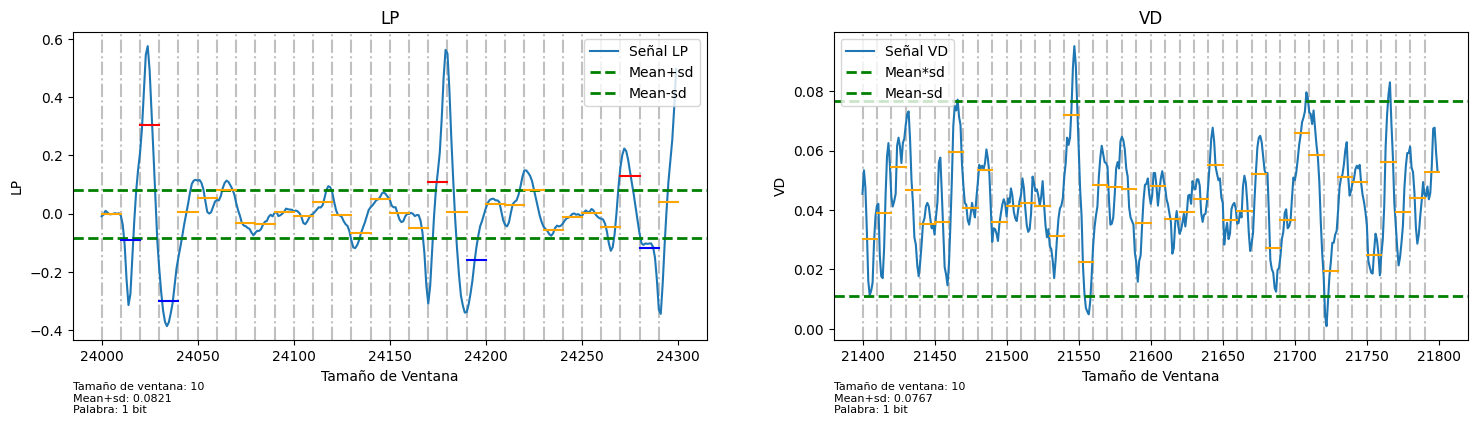

In [11]:
break_size = 10
data_init = 24000
data_end = 24300

data2 = data
data2 = data2.iloc[data_init:data_end]
breaks = np.arange(data_init,data_end,break_size)
data2['breaks'] = np.repeat(breaks,break_size)[0:data_end-data_init]

d = data2.groupby('breaks')[['LP','VD']].agg('mean').reset_index()
d['min_x'] = d['breaks']
d['amx_x'] = d['breaks'] + break_size

plt.subplot(1,2,1)
for i in breaks[breaks<=data_end]:
    plt.axvline(x=i, color = 'silver', linestyle = '-.')

plt.plot(data2.Time, data2.LP, label = 'Señal LP')
plt.axhline(y = high_lp, color='g', linestyle='--', linewidth=2, label = 'Mean+sd')
plt.axhline(y = low_lp, color='g', linestyle='--', linewidth=2, label = 'Mean-sd')
plt.title('LP')
plt.xlabel('Tamaño de Ventana')
plt.ylabel('LP')
plt.legend()
plt.annotate('Tamaño de ventana: '+ str(break_size) + '\nMean+sd: '+ str(round(high_lp,4)) + '\nPalabra: 1 bit', (0,0), (0,-30), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')

for i in range(len(d)):
    c = None
    if d.iloc[i,1] < low_lp:
        c = 'blue'
    elif d.iloc[i,1] >= low_lp and d.iloc[i,1] <= high_lp:
        c = 'orange'
    else:
        c = 'red'
    plt.plot([d.iloc[i,3],d.iloc[i,4]],[d.iloc[i,1], d.iloc[i,1]], color = c)


break_size = 10
data_init = 21400
data_end = 21800

data2 = data
data2 = data2.iloc[data_init:data_end]
breaks = np.arange(data_init,data_end,break_size)
data2['breaks'] = np.repeat(breaks,break_size)[0:data_end-data_init]

d = data2.groupby('breaks')[['LP','VD']].agg('mean').reset_index()
d['min_x'] = d['breaks']
d['amx_x'] = d['breaks'] + break_size

plt.subplot(1, 2, 2)
for i in breaks[breaks<=data_end]:
    plt.axvline(x=i, color = 'silver', linestyle = '-.')
plt.plot(data2.Time, data2.VD, label = 'Señal VD')
plt.axhline(y = high_vd, color='g', linestyle='--', linewidth=2, label =  'Mean*sd')
plt.axhline(y = low_vd, color='g', linestyle='--', linewidth=2, label = 'Mean-sd')
plt.title('VD')
plt.xlabel('Tamaño de Ventana')
plt.ylabel('VD')
plt.legend()
plt.annotate('Tamaño de ventana: '+ str(break_size) + '\nMean+sd: '+ str(round(high_vd,4)) + '\nPalabra: 1 bit', (0,0), (0,-30), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')

for i in range(len(d)):
    c = None
    if d.iloc[i,2] < low_vd:
        c = 'blue'
    elif d.iloc[i,2] >= low_vd and d.iloc[i,2] <= high_vd:
        c = 'orange'
    else:
        c = 'red'
    plt.plot([d.iloc[i,3],d.iloc[i,4]],[d.iloc[i,2], d.iloc[i,2]], color = c)

In [11]:
# for p in range(1,9):
#     palabra = p
#     breaks = np.arange(0,len(data),palabra)
#     data.loc[:,'W'+str(p)] = np.repeat(breaks,palabra)[0:len(data)]

# data.head()

In [12]:
def apply_sax_lp(val):
    if val < low_lp:
        return 'a'
    elif val >= low_lp and val <= high_lp:
        return 'b'
    else:
        return 'c'
    
def apply_sax_vd(val):
    if val < low_vd:
        return 'a'
    elif val >= low_vd and val <= high_vd:
        return 'b'
    else:
        return 'c'

In [13]:
# data_palabras = list()

# for i in data.columns[4:len(data.columns)]:
#     d = data.groupby(i)[['LP','VD']].agg('mean').reset_index()

#     d['CodLP'] = d['LP'].apply(apply_sax_lp)
#     d['CodVD'] = d['VD'].apply(apply_sax_vd)
#     data_palabras.append(d)

#     print('Tamaño de Palabra: %s\nDimensión dataframe: %s'%(str(i),str(d.shape)))
#     print(d.head(3))
#     print('\n')

In [18]:
window_sizes_w = np.arange(1,60,1)

df_w_MI = []
# df_entropy_lp_a_vd = []
# df_entropy_vd_a_lp = []

for win_size in window_sizes_w:
    breaks = np.arange(0,len(data),win_size)
    d = data
    d.loc[:,'breaks'] = np.repeat(breaks,win_size)[0:len(d)]
    d = d.groupby('breaks')[['LP','VD']].agg('mean').reset_index()
    d['CodLP'] = d['LP'].apply(apply_sax_lp)
    d['CodVD'] = d['VD'].apply(apply_sax_vd)

    MI = mutual_info_score(d['CodLP'], d['CodVD'])/win_size
    # Slp = stats.entropy(d['CodLP'])
    # Svd = stats.entropy(d['CodVD'])

    df_w_MI.append(MI)    
    # df_entropy_lp_a_vd.append(MI/Svd)
    # df_entropy_vd_a_lp.append(MI/Slp)



In [19]:
df_w_MI

[1.5254541299702246e-05,
 6.245380478669613e-06,
 3.5877586086191285e-06,
 1.6907067343419936e-06,
 2.082815662526709e-06,
 1.6291828368577312e-06,
 2.3989229792483954e-06,
 2.4444042671389627e-06,
 3.0147583752011955e-06,
 4.8250860459746536e-06,
 3.7967873154978344e-06,
 4.3102883054071e-06,
 5.504546764077749e-06,
 7.352408107678817e-06,
 1.1381198605150258e-05,
 1.3186079516233867e-05,
 1.5675121242181095e-05,
 1.9036136055709364e-05,
 1.970791851858648e-05,
 2.1332829981833615e-05,
 2.0015817454016794e-05,
 1.8579114522818708e-05,
 1.8137314558389802e-05,
 1.4562874486749582e-05,
 1.2037766373310617e-05,
 8.97877936506591e-06,
 5.786532702784118e-06,
 3.3253982579618837e-06,
 2.029897940109369e-06,
 1.059631717013284e-06,
 8.915204651156987e-07,
 4.918127523939158e-07,
 2.896724407106871e-07,
 1.5872991295360856e-07,
 7.441854151645019e-08,
 3.778852918991268e-08,
 1.6251083741136218e-08,
 5.47896166247569e-09,
 2.4191102328162104e-09,
 6.49295233736445e-10,
 2.6282190540757803e-1

In [16]:
window_sizes_w

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


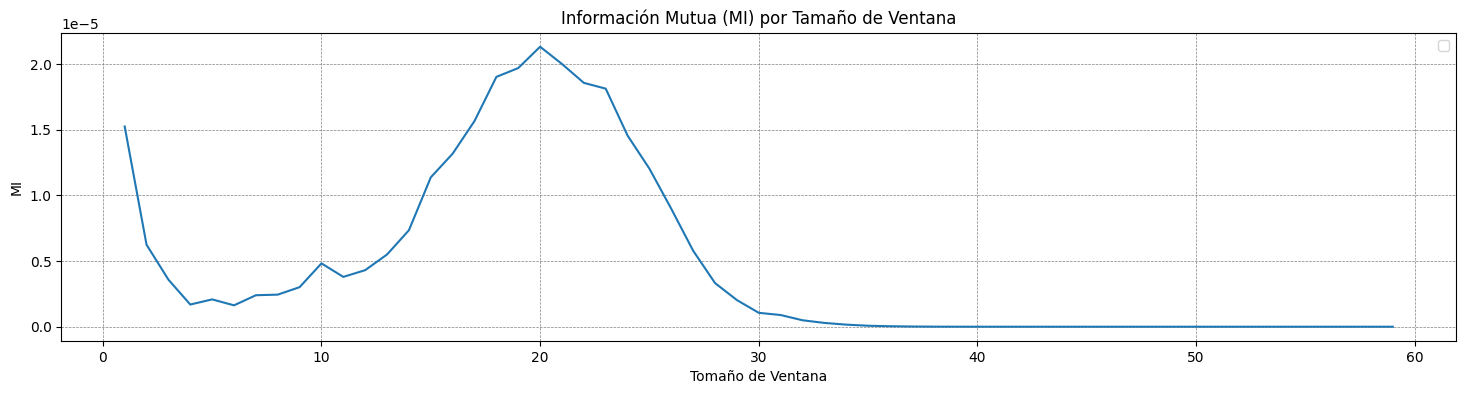

In [20]:

plt.plot(window_sizes_w, df_w_MI)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Información Mutua (MI) por Tamaño de Ventana')
plt.xlabel('Tomaño de Ventana')
plt.ylabel('MI')
plt.legend()